In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

plt.style.use("ggplot")
sns.set_style("dark")

In [2]:
# non-windows moment 
# Move to the parent directory
%cd ..
# Create the 'data' directory in the parent directory
!mkdir -p data
# Install kaggle if not already installed
%pip install kaggle
# Download the dataset to the 'data' directory in the parent directory
!kaggle datasets download -d parisrohan/credit-score-classification -p ./data/


/home/kaiser/work/repos/dataset-sessions/credit-score
Note: you may need to restart the kernel to use updated packages.
Dataset URL: https://www.kaggle.com/datasets/parisrohan/credit-score-classification
License(s): CC0-1.0
 95%|███████████████████████████████████▉  | 9.00M/9.51M [00:05<00:00, 4.20MB/s]
100%|██████████████████████████████████████| 9.51M/9.51M [00:05<00:00, 1.91MB/s]


In [6]:
!unzip -u data/credit-score-classification.zip -d data
%pwd
%cd ./eda # comeback

Archive:  data/credit-score-classification.zip
/home/kaiser/work/repos/dataset-sessions/credit-score/eda


In [8]:
train_df = pd.read_csv("../data/train.csv", decimal=".", engine="python") \
.sample(1500, random_state=42) # working on a slow laptop
test_df = pd.read_csv("../data/test.csv", decimal=".", engine="python")
train_df

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
75721,0x1d1af,CUS_0x3539,February,an Arakalid,30,995-31-4669,Manager,43391.96,3688.996667,1,...,Good,1468.28,29.112468,23 Years and 8 Months,No,0.000000,53.969385063055675,High_spent_Large_value_payments,554.9302816036111,Good
80184,0x1ebd6,CUS_0x8716,January,Matthewz,18,185-99-8068,Scientist,14351.21,NaN,8,...,Bad,4766.87,39.849732,NaN,Yes,61.098718,118.08021357217683,Low_spent_Small_value_payments,238.3144849566528,Poor
19864,0x8a66,CUS_0x21dc,January,Tom Miless,41,241-53-8475,Developer,130125.04,10871.753333,5,...,Good,1195.05,21.542892,15 Years and 11 Months,No,204.285650,1255.8993022448951,Low_spent_Small_value_payments,NaN,Good
76699,0x1d769,CUS_0x32d3,April,Lisaa,35,204-78-6176,Manager,20107.21,1631.600833,6,...,Standard,2544.6,32.423759,19 Years and 4 Months,Yes,27.106395,66.81977464950728,Low_spent_Small_value_payments,359.23391378882377,Poor
92991,0x236dd,CUS_0xadad,August,Masond,27,027-11-6852,Doctor,92186.19,7487.182500,1,...,Good,809.01,39.543131,20 Years and 9 Months,No,185.797654,115.52003931707223,High_spent_Medium_value_payments,697.4005568630175,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24186,0xa3b8,CUS_0xa66,March,Browno,19,#F%$D@*&8,Manager,57994.96,4653.913333,3,...,Good,1096.7,36.410403,18 Years and 3 Months,No,92.471440,235.86802139893655,Low_spent_Large_value_payments,407.05187231130486,Standard
54934,0x157e0,CUS_0x5db2,July,Paulr,22,929-83-1124,Musician,9400.43_,847.369167,7,...,Bad,4505.63,33.373300,7 Years and 3 Months,Yes,30.338701,__10000__,Low_spent_Large_value_payments,245.14841993821807,Standard
74908,0x1ccea,CUS_0x9b0f,May,Ransdell Piersonf,6381,356-37-5102,Musician,14337.56_,1422.796667,3,...,Standard,771.35,32.852228,26 Years and 11 Months,No,28.021465,68.82314774121039,High_spent_Small_value_payments,305.435054174244,Standard
43257,0x11377,CUS_0x56ab,February,Limd,26,313-72-1529,Writer,34508.66,2617.721667,8,...,_,2823.83,39.911949,1 Years and 8 Months,Yes,97.213121,75.29961410409688,High_spent_Medium_value_payments,339.25943205831385,Standard


# EDA
Objective: Start by getting a basic understanding of the dataset. This includes checking the data types of columns, identifying missing values (NaNs), and understanding the overall structure of the data.

In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1500 entries, 75721 to 88878
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        1500 non-null   object 
 1   Customer_ID               1500 non-null   object 
 2   Month                     1500 non-null   object 
 3   Name                      1379 non-null   object 
 4   Age                       1500 non-null   object 
 5   SSN                       1500 non-null   object 
 6   Occupation                1500 non-null   object 
 7   Annual_Income             1500 non-null   object 
 8   Monthly_Inhand_Salary     1277 non-null   float64
 9   Num_Bank_Accounts         1500 non-null   int64  
 10  Num_Credit_Card           1500 non-null   int64  
 11  Interest_Rate             1500 non-null   int64  
 12  Num_of_Loan               1500 non-null   object 
 13  Type_of_Loan              1320 non-null   object 
 14  Delay_fr

In [12]:
duplicate_rows_df = train_df[train_df.duplicated()]
print("number of duplicate rows: ", len(duplicate_rows_df))

number of duplicate rows:  0


In [13]:
train_df = train_df.drop_duplicates()
train_df.head(5)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
75721,0x1d1af,CUS_0x3539,February,an Arakalid,30,995-31-4669,Manager,43391.96,3688.996667,1,...,Good,1468.28,29.112468,23 Years and 8 Months,No,0.000000,53.969385063055675,High_spent_Large_value_payments,554.9302816036111,Good
80184,0x1ebd6,CUS_0x8716,January,Matthewz,18,185-99-8068,Scientist,14351.21,NaN,8,...,Bad,4766.87,39.849732,NaN,Yes,61.098718,118.08021357217683,Low_spent_Small_value_payments,238.3144849566528,Poor
19864,0x8a66,CUS_0x21dc,January,Tom Miless,41,241-53-8475,Developer,130125.04,10871.753333,5,...,Good,1195.05,21.542892,15 Years and 11 Months,No,204.285650,1255.8993022448951,Low_spent_Small_value_payments,NaN,Good
76699,0x1d769,CUS_0x32d3,April,Lisaa,35,204-78-6176,Manager,20107.21,1631.600833,6,...,Standard,2544.6,32.423759,19 Years and 4 Months,Yes,27.106395,66.81977464950728,Low_spent_Small_value_payments,359.23391378882377,Poor
92991,0x236dd,CUS_0xadad,August,Masond,27,027-11-6852,Doctor,92186.19,7487.182500,1,...,Good,809.01,39.543131,20 Years and 9 Months,No,185.797654,115.52003931707223,High_spent_Medium_value_payments,697.4005568630175,Good


How many unique clients do we have?

In [14]:
len(train_df["ID"].unique())

1500

Identifying columns that are incorrectly typed (e.g., numerical data stored as strings) and casting them to the correct data types. This is important for accurate analysis and modeling.

In [15]:
problem_columns_float = [
    "Annual_Income",
    "Changed_Credit_Limit",
    "Outstanding_Debt",
    "Total_EMI_per_month",
    "Amount_invested_monthly",
    "Monthly_Balance",
]
train_df[problem_columns_float]

,Annual_Income,Changed_Credit_Limit,Outstanding_Debt,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
75721,43391.96,10.72,1468.28,0.000000,53.969385063055675,554.9302816036111
80184,14351.21,21.91,4766.87,61.098718,118.08021357217683,238.3144849566528
19864,130125.04,3.82,1195.05,204.285650,1255.8993022448951,NaN
76699,20107.21,10.4,2544.6,27.106395,66.81977464950728,359.23391378882377
92991,92186.19,9.74,809.01,185.797654,115.52003931707223,697.4005568630175
...,...,...,...,...,...,...
24186,57994.96,9.56,1096.7,92.471440,235.86802139893655,407.05187231130486
54934,9400.43_,28.9,4505.63,30.338701,__10000__,245.14841993821807
74908,14337.56_,8.45,771.35,28.021465,68.82314774121039,305.435054174244
43257,34508.66,26.14,2823.83,97.213121,75.29961410409688,339.25943205831385


In [16]:
train_df[problem_columns_float] = train_df[problem_columns_float].apply(
    pd.to_numeric, errors="coerce"
)
train_df[problem_columns_float] = train_df[problem_columns_float].astype("float64")
train_df.loc[:, problem_columns_float].fillna(
    value=train_df[problem_columns_float].median(),
    inplace=True,
)
train_df[problem_columns_float]

,Annual_Income,Changed_Credit_Limit,Outstanding_Debt,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
75721,43391.960,10.72,1468.28,0.000000,53.969385,554.930282
80184,14351.210,21.91,4766.87,61.098718,118.080214,238.314485
19864,130125.040,3.82,1195.05,204.285650,1255.899302,NaN
76699,20107.210,10.40,2544.60,27.106395,66.819775,359.233914
92991,92186.190,9.74,809.01,185.797654,115.520039,697.400557
...,...,...,...,...,...,...
24186,57994.960,9.56,1096.70,92.471440,235.868021,407.051872
54934,NaN,28.90,4505.63,30.338701,NaN,245.148420
74908,NaN,8.45,771.35,28.021465,68.823148,305.435054
43257,34508.660,26.14,2823.83,97.213121,75.299614,339.259432


In [17]:
problem_columns_int = ["Num_of_Loan", "Num_of_Delayed_Payment", "Age"]
train_df[problem_columns_int]

,Num_of_Loan,Num_of_Delayed_Payment,Age
75721,0,6,30
80184,6,17,18
19864,2,0,41
76699,2,13,35
92991,4,0,27
...,...,...,...
24186,2,1,19
54934,5,21,22
74908,4,17,6381
43257,5,17,26


In [18]:
train_df[problem_columns_int] = train_df[problem_columns_int].apply(
    pd.to_numeric, errors="coerce"
)
train_df[problem_columns_int] = train_df[problem_columns_int].astype(pd.Int32Dtype())
train_df.loc[:, problem_columns_int].fillna(
    value=train_df[problem_columns_int].median(), inplace=True
)
train_df[problem_columns_int]

,Num_of_Loan,Num_of_Delayed_Payment,Age
75721,0,6,30
80184,6,17,18
19864,2,0,41
76699,2,13,35
92991,4,0,27
...,...,...,...
24186,2,1,19
54934,5,21,22
74908,4,17,6381
43257,5,17,26


Prepare separate variables for different column types:

In [19]:
number_columns = train_df.select_dtypes("number").columns
categorical_columns = train_df.select_dtypes("object").columns.drop("Credit_Score")
feature_columns = categorical_columns.union(number_columns)
target = train_df["Credit_Score"]
number_columns, categorical_columns

(Index(['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
        'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
        'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
        'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
        'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance'],
       dtype='object'),
 Index(['ID', 'Customer_ID', 'Month', 'Name', 'SSN', 'Occupation',
        'Type_of_Loan', 'Credit_Mix', 'Credit_History_Age',
        'Payment_of_Min_Amount', 'Payment_Behaviour'],
       dtype='object'))

In [20]:
train_df.describe()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,1429.0,1.370000e+03,1277.000000,1500.000000,1500.000000,1500.000000,1435.0,1500.000000,1337.0,1469.000000,1472.000000,1490.000000,1500.000000,1500.000000,1378.000000,1483.000000
mean,107.428971,1.464936e+05,4033.122097,18.843333,26.872000,58.910000,1.664808,21.074000,29.924458,10.432505,23.425951,1411.678020,32.144324,1237.036199,186.749893,405.517222
std,684.307677,1.275536e+06,3101.181950,123.037616,141.419605,409.600732,51.171695,14.677243,239.506287,6.630290,172.335720,1124.099681,5.174845,8039.922545,191.374608,209.520526
min,-500.0,7.019435e+03,382.701667,-1.000000,1.000000,1.000000,-100.0,-5.000000,-3.0,-3.360000,0.000000,0.560000,21.273807,0.000000,0.000000,1.700934
25%,24.0,1.881208e+04,1548.460000,4.000000,4.000000,8.000000,1.0,10.000000,9.0,5.610000,3.000000,597.860000,27.828690,27.099008,67.023442,275.850947
50%,34.0,3.564360e+04,2960.530833,6.000000,5.000000,14.000000,3.0,18.000000,14.0,9.410000,6.000000,1165.900000,32.005719,63.444857,122.086134,339.904831
75%,42.0,7.210261e+04,5820.180000,8.000000,7.000000,20.000000,5.0,28.000000,19.0,14.710000,9.000000,1876.660000,36.437181,143.027544,225.730446,477.113744
max,8569.0,2.067170e+07,14771.740000,1647.000000,1420.000000,5771.000000,1416.0,65.000000,4384.0,33.240000,2551.000000,4987.190000,46.591820,81332.000000,1255.899302,1418.676158


In [21]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1500 entries, 75721 to 88878
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        1500 non-null   object 
 1   Customer_ID               1500 non-null   object 
 2   Month                     1500 non-null   object 
 3   Name                      1379 non-null   object 
 4   Age                       1429 non-null   Int32  
 5   SSN                       1500 non-null   object 
 6   Occupation                1500 non-null   object 
 7   Annual_Income             1370 non-null   float64
 8   Monthly_Inhand_Salary     1277 non-null   float64
 9   Num_Bank_Accounts         1500 non-null   int64  
 10  Num_Credit_Card           1500 non-null   int64  
 11  Interest_Rate             1500 non-null   int64  
 12  Num_of_Loan               1435 non-null   Int32  
 13  Type_of_Loan              1320 non-null   object 
 14  Delay_fr

## Some outliers

Identify and address outliers in the dataset, such as negative values where they don't make sense (e.g., age cannot be negative), or unrealistic values like an age of 8698.

In [22]:
train_df = train_df.drop(
    train_df[
        (train_df["Age"] < 0)
        | (train_df["Age"] > 100)
        | (train_df["Num_Bank_Accounts"] < 0)
        | (train_df["Num_of_Loan"] < 0)
        | (train_df["Num_of_Delayed_Payment"] < 0)
        | (train_df["Delay_from_due_date"] < 0)
    ].index
)
train_df

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
75721,0x1d1af,CUS_0x3539,February,an Arakalid,30,995-31-4669,Manager,43391.960,3688.996667,1,...,Good,1468.28,29.112468,23 Years and 8 Months,No,0.000000,53.969385,High_spent_Large_value_payments,554.930282,Good
80184,0x1ebd6,CUS_0x8716,January,Matthewz,18,185-99-8068,Scientist,14351.210,NaN,8,...,Bad,4766.87,39.849732,NaN,Yes,61.098718,118.080214,Low_spent_Small_value_payments,238.314485,Poor
19864,0x8a66,CUS_0x21dc,January,Tom Miless,41,241-53-8475,Developer,130125.040,10871.753333,5,...,Good,1195.05,21.542892,15 Years and 11 Months,No,204.285650,1255.899302,Low_spent_Small_value_payments,NaN,Good
76699,0x1d769,CUS_0x32d3,April,Lisaa,35,204-78-6176,Manager,20107.210,1631.600833,6,...,Standard,2544.60,32.423759,19 Years and 4 Months,Yes,27.106395,66.819775,Low_spent_Small_value_payments,359.233914,Poor
92991,0x236dd,CUS_0xadad,August,Masond,27,027-11-6852,Doctor,92186.190,7487.182500,1,...,Good,809.01,39.543131,20 Years and 9 Months,No,185.797654,115.520039,High_spent_Medium_value_payments,697.400557,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53081,0x14d07,CUS_0xa11c,February,NaN,27,586-32-1202,Accountant,36913.880,2859.156667,6,...,Bad,4610.78,32.359573,3 Years and 6 Months,NM,214.309266,90.545855,High_spent_Medium_value_payments,231.060545,Poor
24186,0xa3b8,CUS_0xa66,March,Browno,19,#F%$D@*&8,Manager,57994.960,4653.913333,3,...,Good,1096.70,36.410403,18 Years and 3 Months,No,92.471440,235.868021,Low_spent_Large_value_payments,407.051872,Standard
54934,0x157e0,CUS_0x5db2,July,Paulr,22,929-83-1124,Musician,NaN,847.369167,7,...,Bad,4505.63,33.373300,7 Years and 3 Months,Yes,30.338701,NaN,Low_spent_Large_value_payments,245.148420,Standard
43257,0x11377,CUS_0x56ab,February,Limd,26,313-72-1529,Writer,34508.660,2617.721667,8,...,_,2823.83,39.911949,1 Years and 8 Months,Yes,97.213121,75.299614,High_spent_Medium_value_payments,339.259432,Standard


## Various plots
Using visualizations like box plots and pie charts to get insights into the distribution of data, detect outliers, and understand categorical distributions.

### Box plots

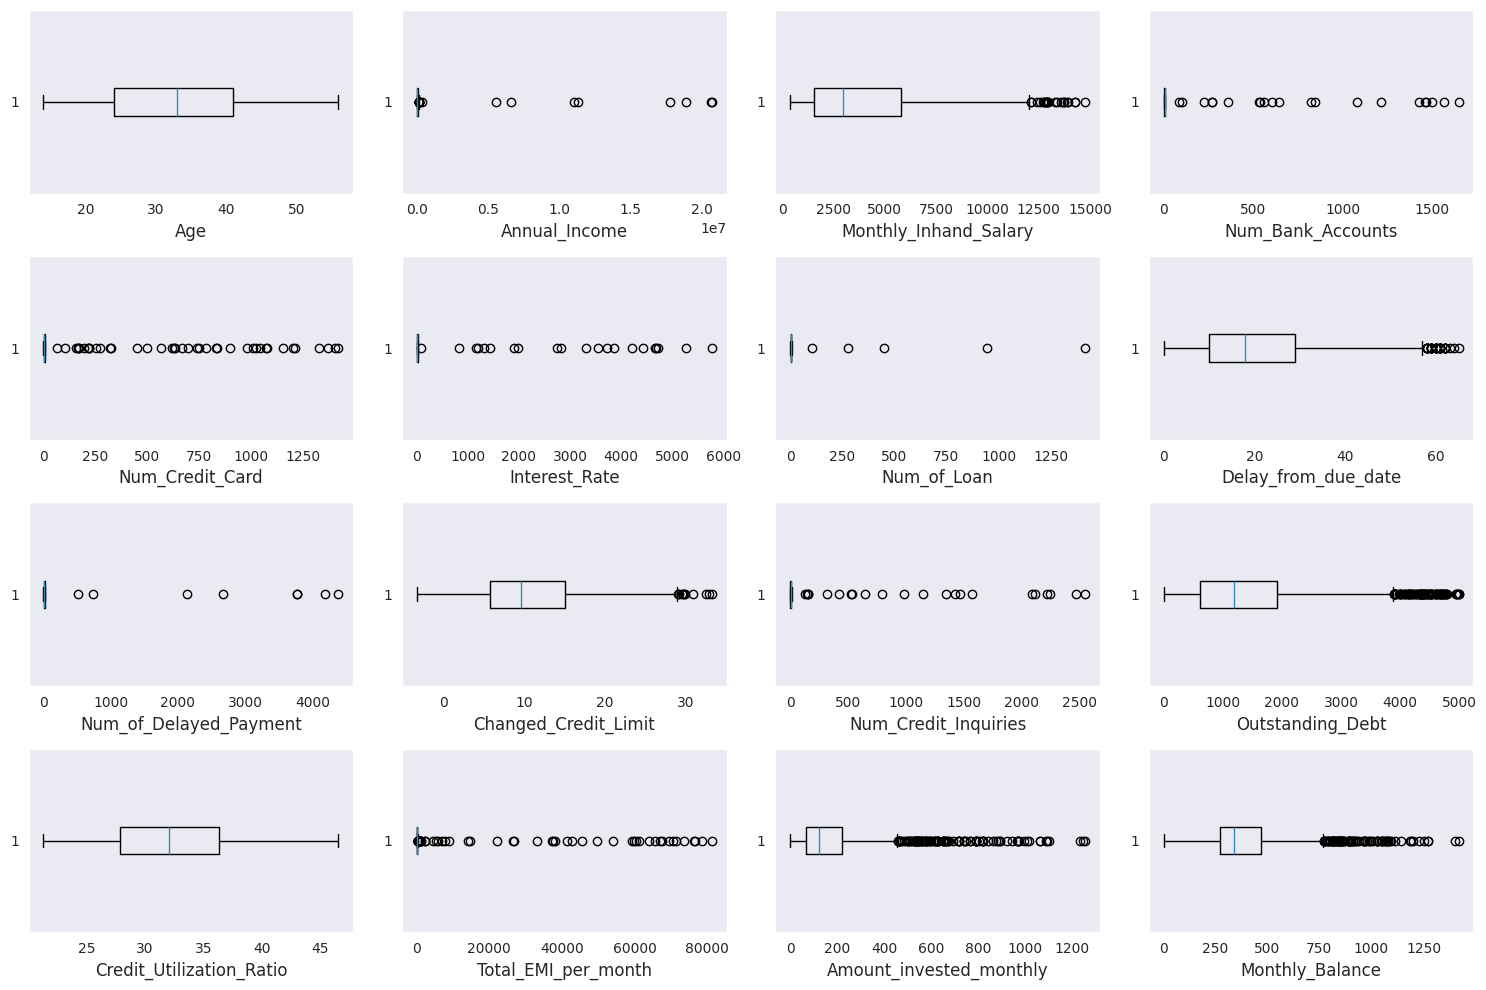

In [23]:
box_data = train_df[
    number_columns
]

nrows = 4

fig, axes = plt.subplots(nrows, len(number_columns)//nrows, figsize=(15, 10))

for i, column in enumerate(box_data.columns):
    row = i // (len(number_columns) // nrows)  
    col = i % (len(number_columns) // nrows) 


    non_nan_data = box_data[column].dropna()
    axes[row, col].boxplot(non_nan_data, vert=False)
    axes[row, col].set_xlabel(column)

plt.tight_layout()
plt.show()

This box plot shows that there are many outliers (points outside the whiskers), indicating possible data issues or extreme variability.

### Pie charts

In [24]:
train_df[
    [
        "Month",
        "Occupation",
        "Type_of_Loan",
        "Credit_Mix",
        "Payment_of_Min_Amount",
        "Payment_Behaviour",
        "Credit_Score",
    ]
].value_counts()

Month     Occupation    Type_of_Loan                                                                                                                                                                 Credit_Mix  Payment_of_Min_Amount  Payment_Behaviour                 Credit_Score
January   Engineer      Payday Loan                                                                                                                                                                  Good        No                     High_spent_Medium_value_payments  Good            2
June      Entrepreneur  Home Equity Loan, Mortgage Loan, Home Equity Loan, Debt Consolidation Loan, Credit-Builder Loan, Payday Loan, Credit-Builder Loan, Payday Loan, and Debt Consolidation Loan  Bad         Yes                    !@9#%8                            Poor            1
          Journalist    Mortgage Loan, Mortgage Loan, Payday Loan, Home Equity Loan, Student Loan, and Mortgage Loan                                     

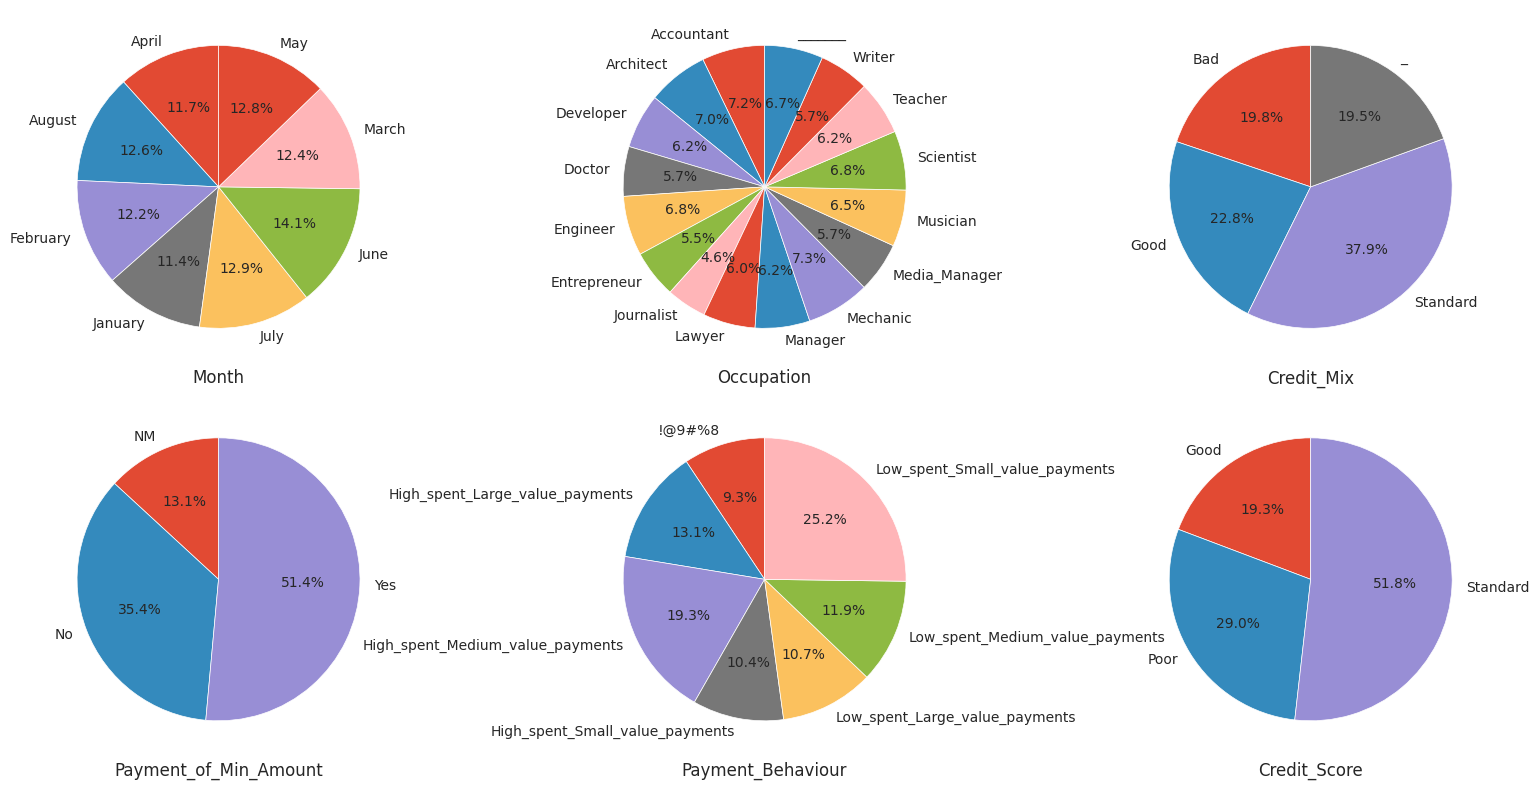

In [25]:
pie_data = train_df[
    [
        "Month",
        "Occupation",
        "Credit_Mix",
        "Payment_of_Min_Amount",
        "Payment_Behaviour",
        "Credit_Score",
    ]
]

nrows = 2
ncols = 3  
fig, axes = plt.subplots(nrows, ncols, figsize=(15, 8))

for i, column in enumerate(pie_data.columns):
    row = i // ncols
    col = i % ncols

    grouped_data = pie_data.groupby(column).size().reset_index(name="counts")

    # Extract data for the pie chart
    labels = grouped_data[column]
    sizes = grouped_data["counts"]

    # Plot pie chart in the correct subplot
    axes[row, col].pie(sizes, labels=labels, autopct="%1.1f%%", startangle=90)
    axes[row, col].set_xlabel(column)

plt.tight_layout()
plt.show()

This pie chart shows the distribution of categories within 'categorical_column'. It reveals that some categories dominate the dataset, while others are underrepresented.

#### Donut charts (nested pie charts)

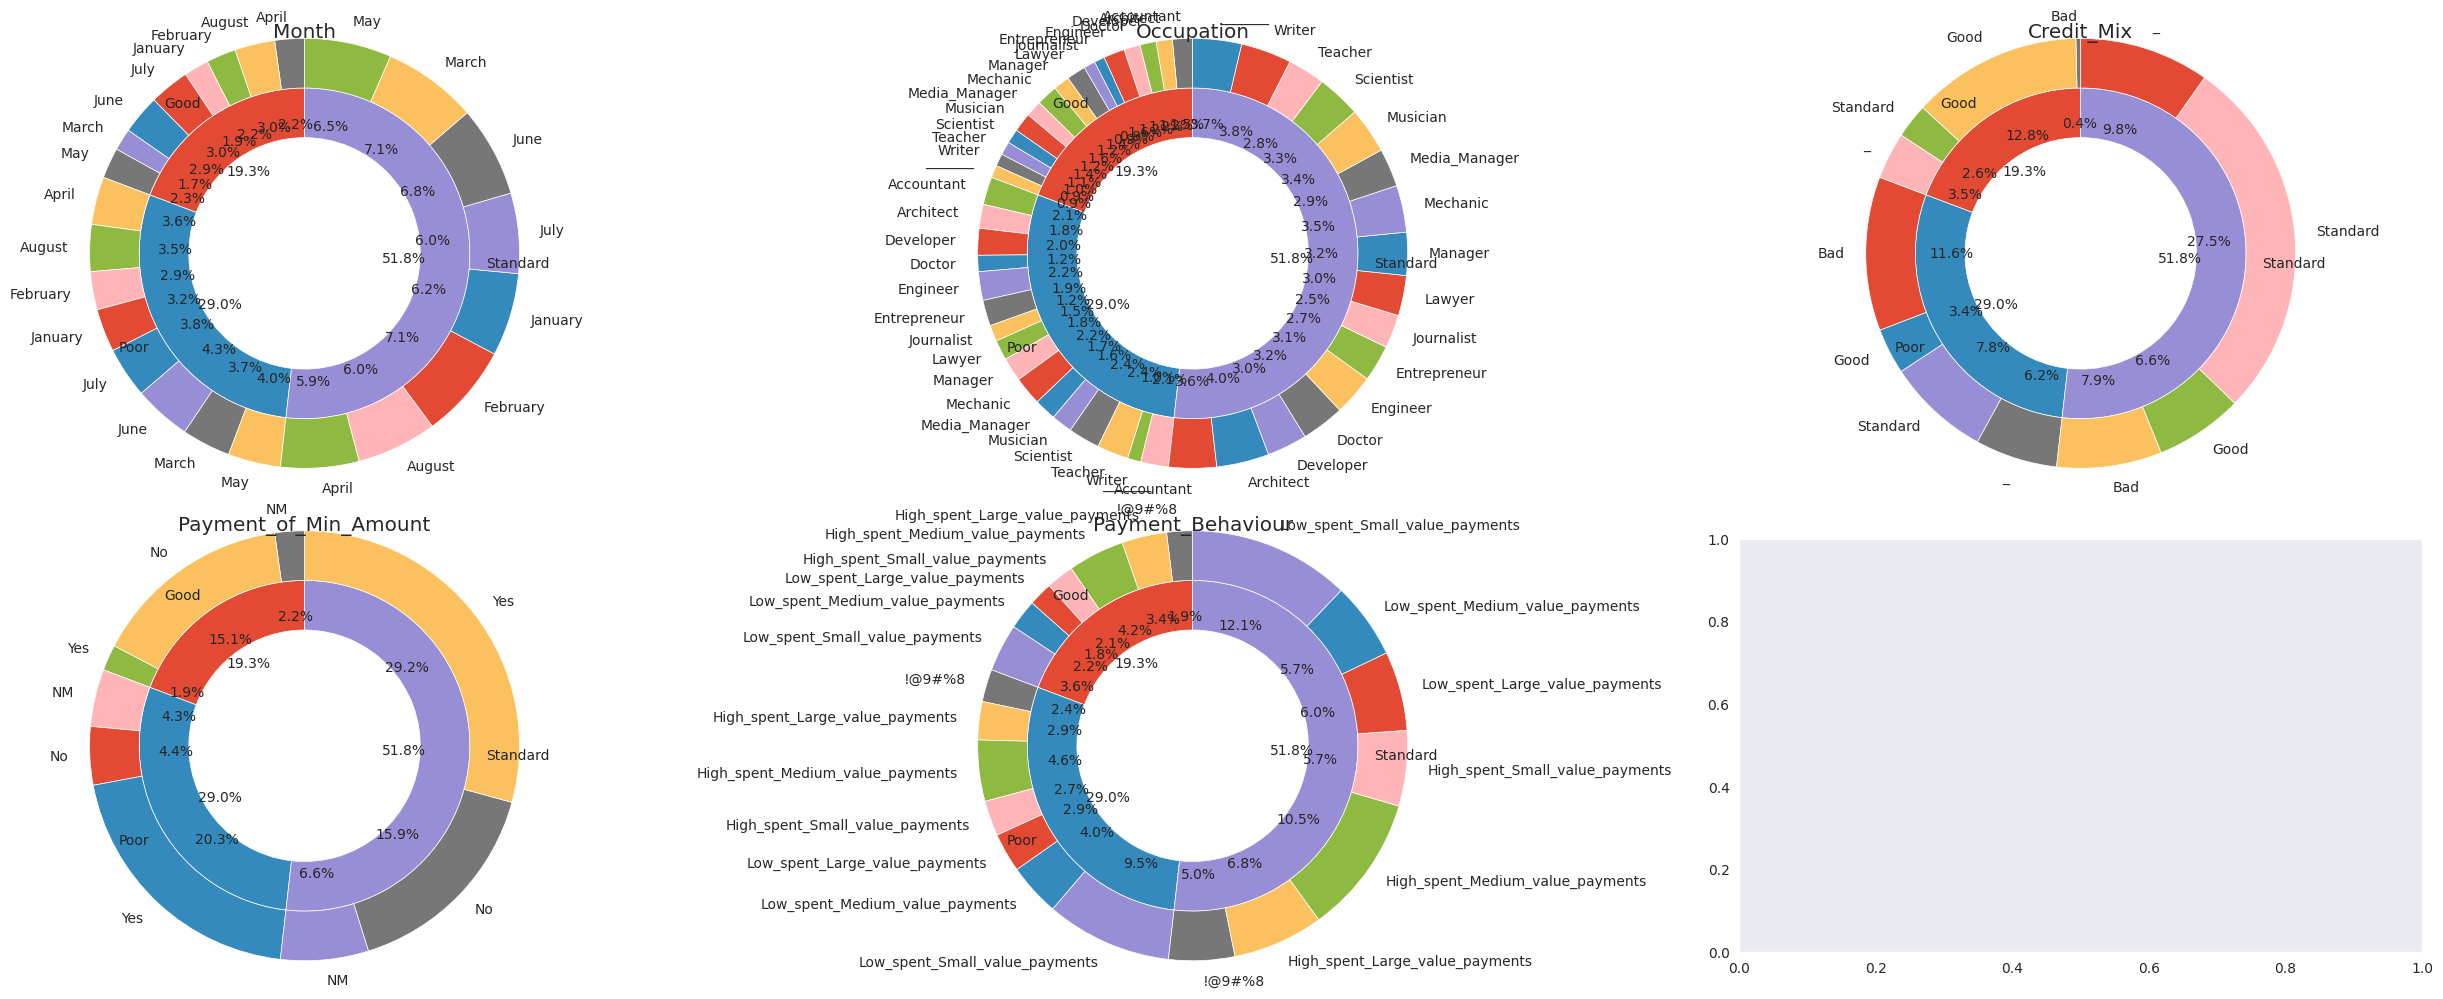

In [26]:
pie_data = train_df[
    [
        "Month",
        "Occupation",
        "Credit_Mix",
        "Payment_of_Min_Amount",
        "Payment_Behaviour",
        "Credit_Score",
    ]
]

# Group by 'Credit_Score' for the inner layer
inner_group = pie_data.groupby('Credit_Score').size().reset_index(name='counts')
inner_labels = inner_group['Credit_Score']
inner_sizes = inner_group['counts']

# Define the outer layers (columns other than 'Credit_Score')
outer_columns = ["Month", "Occupation", "Credit_Mix", "Payment_of_Min_Amount", "Payment_Behaviour"]

nrows = 2
ncols = 3

fig, axes = plt.subplots(nrows, ncols, figsize=(25, 10))

for i, column in enumerate(outer_columns):
    outer_group = pie_data.groupby(['Credit_Score', column]).size().reset_index(name='counts')
    
    row = i // ncols
    col = i % ncols

    # Create the outer labels and sizes based on the groups
    outer_labels = outer_group[column]
    outer_sizes = outer_group['counts']
    
    # Create the donut chart
    axes[row, col].pie(inner_sizes, labels=inner_labels, radius=1, wedgeprops=dict(width=0.3, edgecolor='w'), autopct="%1.1f%%", startangle=90)
    axes[row, col].pie(outer_sizes, labels=outer_labels, radius=1.3, wedgeprops=dict(width=0.3, edgecolor='w'), autopct="%1.1f%%", startangle=90)
    
    # Add title for the outer layer
    axes[row, col].set_title(column)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

looks ugly

## Dealing with Missing Values & Feature Extraction
**Objective**: Identify columns with missing values and decide how to handle them (e.g., drop, fill, or impute). Also, extract new features from existing data to enhance the dataset.

Finding nulls in data:

In [27]:
train_df.isnull().sum()

ID                            0
Customer_ID                   0
Month                         0
Name                        112
Age                          69
SSN                           0
Occupation                    0
Annual_Income               126
Monthly_Inhand_Salary       207
Num_Bank_Accounts             0
Num_Credit_Card               0
Interest_Rate                 0
Num_of_Loan                  62
Type_of_Loan                163
Delay_from_due_date           0
Num_of_Delayed_Payment      148
Changed_Credit_Limit         31
Num_Credit_Inquiries         23
Credit_Mix                    0
Outstanding_Debt             10
Credit_Utilization_Ratio      0
Credit_History_Age          132
Payment_of_Min_Amount         0
Total_EMI_per_month           0
Amount_invested_monthly     114
Payment_Behaviour             0
Monthly_Balance              15
Credit_Score                  0
dtype: int64

The 'Name' column is not crucial for our analysis since we have 'ID' as a unique identifier. We can safely drop the 'Name' column.

In [28]:
def delete_col(cols):
    """
    Drops a specified column from the DataFrame and its associated index variable.
    """
    global train_df, categorical_columns, number_columns
    train_df.drop(columns=cols, inplace=True)

    for col in cols:
        if col in categorical_columns:
            categorical_columns = categorical_columns.drop(col)
        else:
            number_columns = number_columns.drop(col)


delete_col(["Name", "Customer_ID", "SSN"])

Although usage of `nonlocal` is not recommended, in this case it is okay.

In [29]:
train_df["Credit_History_Age"].value_counts()

Credit_History_Age
17 Years and 9 Months     11
16 Years and 10 Months    10
17 Years and 11 Months    10
16 Years and 3 Months     10
8 Years and 3 Months       9
                          ..
33 Years and 0 Months      1
0 Years and 9 Months       1
27 Years and 10 Months     1
4 Years and 11 Months      1
1 Years and 8 Months       1
Name: count, Length: 358, dtype: int64

### Transforming `Credit_History_Age`

In [30]:
train_df["Credit_History_Age"]

75721     23 Years and 8 Months
80184                       NaN
19864    15 Years and 11 Months
76699     19 Years and 4 Months
92991     20 Years and 9 Months
                  ...          
53081      3 Years and 6 Months
24186     18 Years and 3 Months
54934      7 Years and 3 Months
43257      1 Years and 8 Months
88878    19 Years and 11 Months
Name: Credit_History_Age, Length: 1392, dtype: object

Convert the `Credit_History_Age` column to a int format to facilitate analysis and avoid creating too many columns during one-hot encoding.

In [31]:
split_credit_history = train_df["Credit_History_Age"].str.extract(
    r"(\d+)\sYears\sand\s(\d+)\sMonths"
)

total_months = split_credit_history[0].astype(
    pd.Int32Dtype()
) * 12 + split_credit_history[1].astype(pd.Int32Dtype())

train_df["Credit_History_Age"] = total_months
total_months

75721     284
80184    <NA>
19864     191
76699     232
92991     249
         ... 
53081      42
24186     219
54934      87
43257      20
88878     239
Length: 1392, dtype: Int32

### Handling `Type_of_Loan`
By splitting and exploding 'Type_of_Loan', we can handle cases where a single individual has multiple loans, making the data more granular and accurate for analysis.

In [32]:
train_df["Type_of_Loan"].value_counts().head(20)

Type_of_Loan
Not Specified                                       29
Credit-Builder Loan                                 25
Home Equity Loan                                    22
Personal Loan                                       21
Payday Loan                                         18
Mortgage Loan                                       18
Debt Consolidation Loan                             14
Student Loan                                        13
Auto Loan                                           11
Mortgage Loan, and Student Loan                      9
Payday Loan, and Student Loan                        7
Payday Loan, and Personal Loan                       7
Personal Loan, and Mortgage Loan                     6
Student Loan, and Mortgage Loan                      6
Personal Loan, and Student Loan                      6
Credit-Builder Loan, and Home Equity Loan            6
Debt Consolidation Loan, and Home Equity Loan        6
Not Specified, and Mortgage Loan                    

In [33]:
loan_types = [
    "Not Specified",
    "Credit-Builder Loan",
    "Personal Loan",
    "Debt Consolidation Loan",
    "Student Loan",
    "Payday Loan",
    "Mortgage Loan",
    "Auto Loan",
    "Home Equity Loan",
]

train_df["Type_of_Loan"].fillna("", inplace=True)
for suffix in loan_types:
    train_df["Type_of_Loan_" + suffix] = train_df["Type_of_Loan"].apply(
        lambda x: suffix in x.split(", ")
    )

delete_col(["Type_of_Loan"])

/tmp/ipykernel_55204/65363886.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df["Type_of_Loan"].fillna("", inplace=True)


In [34]:
train_df

,ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Credit_Score,Type_of_Loan_Not Specified,Type_of_Loan_Credit-Builder Loan,Type_of_Loan_Personal Loan,Type_of_Loan_Debt Consolidation Loan,Type_of_Loan_Student Loan,Type_of_Loan_Payday Loan,Type_of_Loan_Mortgage Loan,Type_of_Loan_Auto Loan,Type_of_Loan_Home Equity Loan
75721,0x1d1af,February,30,Manager,43391.960,3688.996667,1,5,10,0,...,Good,False,False,False,False,False,False,False,False,False
80184,0x1ebd6,January,18,Scientist,14351.210,NaN,8,7,18,6,...,Poor,True,False,True,False,True,False,True,False,False
19864,0x8a66,January,41,Developer,130125.040,10871.753333,5,2,11,2,...,Good,False,False,False,False,False,False,True,False,False
76699,0x1d769,April,35,Manager,20107.210,1631.600833,6,6,32,2,...,Poor,False,True,False,False,False,False,False,False,False
92991,0x236dd,August,27,Doctor,92186.190,7487.182500,1,2,12,4,...,Good,True,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53081,0x14d07,February,27,Accountant,36913.880,2859.156667,6,5,16,7,...,Poor,True,True,True,False,True,False,True,True,False
24186,0xa3b8,March,19,Manager,57994.960,4653.913333,3,5,1,2,...,Standard,True,False,False,False,False,False,False,False,False
54934,0x157e0,July,22,Musician,NaN,847.369167,7,8,22,5,...,Standard,True,False,False,True,False,True,False,False,False
43257,0x11377,February,26,Writer,34508.660,2617.721667,8,7,26,5,...,Standard,False,False,False,True,True,False,False,False,True


In [35]:
categorical_columns = categorical_columns.drop("Credit_History_Age")
number_columns = number_columns.append(pd.Index(["Credit_History_Age"]))
number_columns, categorical_columns

(Index(['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
        'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
        'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
        'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
        'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance',
        'Credit_History_Age'],
       dtype='object'),
 Index(['ID', 'Month', 'Occupation', 'Credit_Mix', 'Payment_of_Min_Amount',
        'Payment_Behaviour'],
       dtype='object'))

In [36]:
train_df = pd.get_dummies(
    train_df,
    columns=[
        "Month",
        "Occupation",
        "Credit_Mix",
        "Payment_of_Min_Amount",
        "Payment_Behaviour",
    ],
    drop_first=True,
)
train_df = pd.get_dummies(train_df, columns=["Credit_Score"])
train_df

,ID,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Payment_of_Min_Amount_Yes,Payment_Behaviour_High_spent_Large_value_payments,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments,Credit_Score_Good,Credit_Score_Poor,Credit_Score_Standard
75721,0x1d1af,30,43391.960,3688.996667,1,5,10,0,9,6,...,False,True,False,False,False,False,False,True,False,False
80184,0x1ebd6,18,14351.210,NaN,8,7,18,6,18,17,...,True,False,False,False,False,False,True,False,True,False
19864,0x8a66,41,130125.040,10871.753333,5,2,11,2,3,0,...,False,False,False,False,False,False,True,True,False,False
76699,0x1d769,35,20107.210,1631.600833,6,6,32,2,15,13,...,True,False,False,False,False,False,True,False,True,False
92991,0x236dd,27,92186.190,7487.182500,1,2,12,4,1,0,...,False,False,True,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53081,0x14d07,27,36913.880,2859.156667,6,5,16,7,48,18,...,False,False,True,False,False,False,False,False,True,False
24186,0xa3b8,19,57994.960,4653.913333,3,5,1,2,7,1,...,False,False,False,False,True,False,False,False,False,True
54934,0x157e0,22,NaN,847.369167,7,8,22,5,32,21,...,True,False,False,False,True,False,False,False,False,True
43257,0x11377,26,34508.660,2617.721667,8,7,26,5,42,17,...,True,False,True,False,False,False,False,False,False,True


In [37]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1392 entries, 75721 to 88878
Data columns (total 63 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   ID                                                  1392 non-null   object 
 1   Age                                                 1323 non-null   Int32  
 2   Annual_Income                                       1266 non-null   float64
 3   Monthly_Inhand_Salary                               1185 non-null   float64
 4   Num_Bank_Accounts                                   1392 non-null   int64  
 5   Num_Credit_Card                                     1392 non-null   int64  
 6   Interest_Rate                                       1392 non-null   int64  
 7   Num_of_Loan                                         1330 non-null   Int32  
 8   Delay_from_due_date                                 1392 non-null   int64  
 9

In [45]:
from sklearn.impute import KNNImputer, SimpleImputer

id_column = train_df['ID']
features = train_df.drop(columns=['ID'])

knn_imputer = KNNImputer(
    n_neighbors=1
)  # at least 1 neighbor, because running one cell for 7 minutes is too harsh
# knn_imputer = SimpleImputer(strategy='median')


X_knn_imputed = knn_imputer.fit_transform(features)
X_knn_imputed

array([[3.00000000e+01, 4.33919600e+04, 3.68899667e+03, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.80000000e+01, 1.43512100e+04, 9.59346250e+02, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [4.10000000e+01, 1.30125040e+05, 1.08717533e+04, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [2.20000000e+01, 8.76658000e+03, 8.47369167e+02, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [2.60000000e+01, 3.45086600e+04, 2.61772167e+03, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [1.90000000e+01, 1.39909250e+04, 1.30991042e+03, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])

In [46]:
train_df_knn_imputed = pd.DataFrame(X_knn_imputed, columns=features.columns, index=features.index).astype(features.dtypes.to_dict())
result_df = train_df_knn_imputed.copy()
# result_df["ID"] = id_column.reset_index(drop=True)
result_df

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,...,Payment_of_Min_Amount_Yes,Payment_Behaviour_High_spent_Large_value_payments,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments,Credit_Score_Good,Credit_Score_Poor,Credit_Score_Standard
75721,30,43391.960,3688.996667,1,5,10,0,9,6,10.72,...,False,True,False,False,False,False,False,True,False,False
80184,18,14351.210,959.346250,8,7,18,6,18,17,21.91,...,True,False,False,False,False,False,True,False,True,False
19864,41,130125.040,10871.753333,5,2,11,2,3,0,3.82,...,False,False,False,False,False,False,True,True,False,False
76699,35,20107.210,1631.600833,6,6,32,2,15,13,10.40,...,True,False,False,False,False,False,True,False,True,False
92991,27,92186.190,7487.182500,1,2,12,4,1,0,9.74,...,False,False,True,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53081,27,36913.880,2859.156667,6,5,16,7,48,18,28.27,...,False,False,True,False,False,False,False,False,True,False
24186,19,57994.960,4653.913333,3,5,1,2,7,1,9.56,...,False,False,False,False,True,False,False,False,False,True
54934,22,8766.580,847.369167,7,8,22,5,32,21,28.90,...,True,False,False,False,True,False,False,False,False,True
43257,26,34508.660,2617.721667,8,7,26,5,42,17,26.14,...,True,False,True,False,False,False,False,False,False,True


In [47]:
id_column

75721    0x1d1af
80184    0x1ebd6
19864     0x8a66
76699    0x1d769
92991    0x236dd
          ...   
53081    0x14d07
24186     0xa3b8
54934    0x157e0
43257    0x11377
88878    0x21ec4
Name: ID, Length: 1392, dtype: object

In [48]:
train_df_knn_imputed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1392 entries, 75721 to 88878
Data columns (total 62 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Age                                                 1392 non-null   Int32  
 1   Annual_Income                                       1392 non-null   float64
 2   Monthly_Inhand_Salary                               1392 non-null   float64
 3   Num_Bank_Accounts                                   1392 non-null   int64  
 4   Num_Credit_Card                                     1392 non-null   int64  
 5   Interest_Rate                                       1392 non-null   int64  
 6   Num_of_Loan                                         1392 non-null   Int32  
 7   Delay_from_due_date                                 1392 non-null   int64  
 8   Num_of_Delayed_Payment                              1392 non-null   Int32  
 9

# Baseline
Creating a simple baseline model before diving into complex modeling. This helps to understand the minimum performance we can expect.

In [49]:
preprocessed_df = train_df_knn_imputed.drop(
        columns=["Credit_Score_Good", "Credit_Score_Standard", "Credit_Score_Poor"]
    )
preprocessed_df

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,...,Credit_Mix_Standard,Credit_Mix__,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes,Payment_Behaviour_High_spent_Large_value_payments,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments
75721,30,43391.960,3688.996667,1,5,10,0,9,6,10.72,...,False,False,True,False,True,False,False,False,False,False
80184,18,14351.210,959.346250,8,7,18,6,18,17,21.91,...,False,False,False,True,False,False,False,False,False,True
19864,41,130125.040,10871.753333,5,2,11,2,3,0,3.82,...,False,False,True,False,False,False,False,False,False,True
76699,35,20107.210,1631.600833,6,6,32,2,15,13,10.40,...,True,False,False,True,False,False,False,False,False,True
92991,27,92186.190,7487.182500,1,2,12,4,1,0,9.74,...,False,False,True,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53081,27,36913.880,2859.156667,6,5,16,7,48,18,28.27,...,False,False,False,False,False,True,False,False,False,False
24186,19,57994.960,4653.913333,3,5,1,2,7,1,9.56,...,False,False,True,False,False,False,False,True,False,False
54934,22,8766.580,847.369167,7,8,22,5,32,21,28.90,...,False,False,False,True,False,False,False,True,False,False
43257,26,34508.660,2617.721667,8,7,26,5,42,17,26.14,...,False,True,False,True,False,True,False,False,False,False


In [50]:
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    preprocessed_df,
    target[preprocessed_df.index],
    test_size=0.33,
    random_state=42,
)

dummy_classifier = DummyClassifier(random_state=42)
dummy_classifier.fit(X_train, y_train)
dummy_classifier.predict(X_test)

array(['Standard', 'Standard', 'Standard', 'Standard', 'Standard',
       'Standard', 'Standard', 'Standard', 'Standard', 'Standard',
       'Standard', 'Standard', 'Standard', 'Standard', 'Standard',
       'Standard', 'Standard', 'Standard', 'Standard', 'Standard',
       'Standard', 'Standard', 'Standard', 'Standard', 'Standard',
       'Standard', 'Standard', 'Standard', 'Standard', 'Standard',
       'Standard', 'Standard', 'Standard', 'Standard', 'Standard',
       'Standard', 'Standard', 'Standard', 'Standard', 'Standard',
       'Standard', 'Standard', 'Standard', 'Standard', 'Standard',
       'Standard', 'Standard', 'Standard', 'Standard', 'Standard',
       'Standard', 'Standard', 'Standard', 'Standard', 'Standard',
       'Standard', 'Standard', 'Standard', 'Standard', 'Standard',
       'Standard', 'Standard', 'Standard', 'Standard', 'Standard',
       'Standard', 'Standard', 'Standard', 'Standard', 'Standard',
       'Standard', 'Standard', 'Standard', 'Standard', 'Standa

In [51]:
from sklearn.metrics import balanced_accuracy_score

balanced_accuracy_score(y_test, dummy_classifier.predict(X_test))

0.3333333333333333

# Saving preprocessed data
Jupyter provides a %store magic command to pass variables between notebooks.

In [53]:
X = preprocessed_df
y = target[X.index] # because I've reduced length of dataset to 1000
%store X y

Stored 'X' (DataFrame)
Stored 'y' (Series)
